In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False
# plt.style.use("ggplot")

%matplotlib inline

p = sns.color_palette()
sns.set_style("darkgrid", {"font.sans-serif": ['simhei', 'Arial']})

In [2]:
feature_label = pd.read_csv("./product/filter_feature.csv")

In [3]:
# 经过清洗并且提取完特征后的数据集
feature_label.head()

,用户性别,用户教育程度,收入程度,支出程度,浏览次数,上期还款差额,信用卡额度,平均本期账单最低还款额,平均消费笔数,平均本期账单金额,是否逾期
0,1,4,0.000000,11.192152,1710,2.730547,19.971271,17.220095,10.750000,18.825107,0
1,1,4,0.000000,12.457337,420,-3.524092,19.973385,17.866453,1.444444,19.007284,0
2,2,2,0.000000,11.430923,702,0.073337,18.307126,10.292788,1.791667,17.199134,0
3,1,4,14.473609,10.781947,783,19.825318,19.740221,15.902257,0.000000,12.969975,0
4,1,4,0.000000,11.034576,671,-12.607495,17.309158,18.206423,2.251572,15.892834,0


In [4]:
feature_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   用户性别         5735 non-null   int64  
 1   用户教育程度       5735 non-null   int64  
 2   收入程度         5735 non-null   float64
 3   支出程度         5735 non-null   float64
 4   浏览次数         5735 non-null   int64  
 5   上期还款差额       5735 non-null   float64
 6   信用卡额度        5735 non-null   float64
 7   平均本期账单最低还款额  5735 non-null   float64
 8   平均消费笔数       5735 non-null   float64
 9   平均本期账单金额     5735 non-null   float64
 10  是否逾期         5735 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 493.0 KB


In [5]:
feature_label.loc[:, ["是否逾期", "用户性别"]].groupby("是否逾期", as_index=False).count()

,是否逾期,用户性别
0,0,4899
1,1,836


1为少数类，而且两者相差很多，因此不能只看准确率。

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.metrics import roc_auc_score as AUC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_curve
import xgboost as XGB

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    feature_label.iloc[:, 0:-1], feature_label["是否逾期"], test_size=0.25,random_state=42)

In [8]:
def plot_roc(predict_proba, y, name="example"):
    FPR, recall, thresholds = roc_curve(y, predict_proba[:, 1], pos_label=1)

    area = AUC(np.array(y), predict_proba[:, 1])

    plt.plot(FPR, recall, color='red',
             label='ROC curve (area = %0.2f)' % area)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('Recall')
    plt.title(name)
    plt.legend(loc="lower right")
    plt.show()

In [9]:
def plot_roc_multi(predict_proba, y, nrows=1, ncols=1, num=1, name="example"):
    FPR, recall, thresholds = roc_curve(y, predict_proba[:, 1], pos_label=1)

    area = AUC(np.array(y), predict_proba[:, 1])

    plt.subplot(nrows, ncols, num)
    plt.plot(FPR, recall, color='red',
             label='ROC curve (area = %0.2f)' % area)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('Recall')
    plt.title(name)
    plt.legend(loc="lower right")

In [10]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 逻辑回归

## 初始参数

In [11]:
lr = LogisticRegression().fit(x_train, y_train)

D:\learn\anaconda3\envs\learn\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
predict = lr.predict(x_test)

In [13]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1224
           1       0.00      0.00      0.00       210

    accuracy                           0.85      1434
   macro avg       0.43      0.50      0.46      1434
weighted avg       0.73      0.85      0.79      1434



D:\learn\anaconda3\envs\learn\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


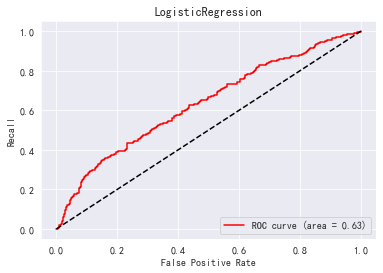

In [14]:
plot_roc(lr.predict_proba(x_test),
         y_test.to_list(), name="LogisticRegression")

## max_iter

In [15]:
auc_line = list()
accu_line = list()
iter_num = np.arange(1,400, 10)
for i in iter_num:
    auc = cross_val_score(LogisticRegression(
        max_iter=i), x_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()
    accu = cross_val_score(LogisticRegression(
        max_iter=i), x_train, y_train, cv=cv, n_jobs=-1).mean()
    auc_line.append(auc)
    accu_line.append(accu)

iter_num为 391 时，auc最大,为 0.6012942791529104
iter_num为 1 时，accu最大，为 0.8544534478567376


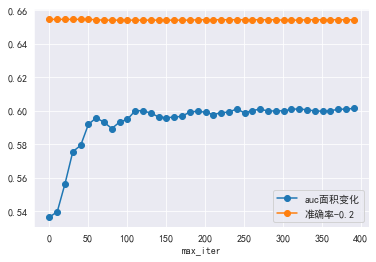

In [16]:
print("iter_num为", iter_num[auc_line.index(
    max(auc_line))], "时，auc最大,为", max(auc_line))
print("iter_num为", iter_num[accu_line.index(
    max(accu_line))], "时，accu最大，为", max(accu_line))

plt.figure()
plt.plot(iter_num, auc_line, "-o", label="auc面积变化")
plt.xlabel("max_iter")
plt.plot(iter_num, np.array(accu_line)-0.2, "-o", label="准确率-0.2")
plt.legend()
plt.show()

max_iter到达一定程度后对两个指标都基本没有影响，这里就选择auc最高的地方

In [17]:
lr_iter_num_best = iter_num[auc_line.index(max(auc_line))]

In [18]:
lr_iter_num_best

391

## class_weight

In [19]:
auc_line = list()
accu_line = list()
p_weight = np.arange(0, 20,0.5)
for i in p_weight:
    auc = cross_val_score(LogisticRegression(max_iter=lr_iter_num_best, class_weight={
                          0: 1, 1: i}), x_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()
    accu = cross_val_score(LogisticRegression(max_iter=lr_iter_num_best, class_weight={
                           0: 1, 1: i}), x_train, y_train, cv=cv, n_jobs=-1).mean()
    auc_line.append(auc)
    accu_line.append(accu)

p_weight为 0.5 时，auc最大,为 0.6074319978118601
p_weight为 0.0 时，accu最大，为 0.8544534478567376


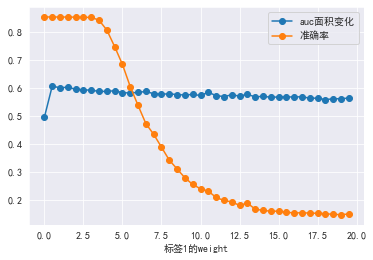

In [20]:
print("p_weight为", p_weight[auc_line.index(
    max(auc_line))], "时，auc最大,为", max(auc_line))
print("p_weight为", p_weight[accu_line.index(
    max(accu_line))], "时，accu最大，为", max(accu_line))
plt.figure()
plt.plot(p_weight, auc_line, "-o", label="auc面积变化")
plt.xlabel("标签1的weight")
plt.plot(p_weight, accu_line, "-o", label="准确率")
plt.legend()
plt.show()

auc 基本不变，但准确率大幅下降，应该在0-2.5之间找auc最高的点

p_weight为 0.1 时，auc最大,为 0.6140552065680097
p_weight为 0.0 时，accu最大，为 0.8544534478567376


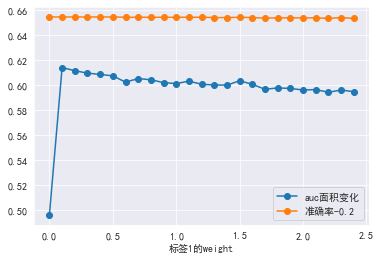

In [21]:
auc_line = list()
accu_line = list()
p_weight = np.arange(0, 2.5,0.1)
for i in p_weight:
    auc = cross_val_score(LogisticRegression(max_iter=lr_iter_num_best, class_weight={
                          0: 1, 1: i}), x_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()
    accu = cross_val_score(LogisticRegression(max_iter=lr_iter_num_best, class_weight={
                           0: 1, 1: i}), x_train, y_train, cv=cv, n_jobs=-1).mean()
    auc_line.append(auc)
    accu_line.append(accu)

print("p_weight为", p_weight[auc_line.index(
    max(auc_line))], "时，auc最大,为", max(auc_line))
print("p_weight为", p_weight[accu_line.index(
    max(accu_line))], "时，accu最大，为", max(accu_line))
plt.figure()
plt.plot(p_weight, auc_line, "-o", label="auc面积变化")
plt.xlabel("标签1的weight")
plt.plot(p_weight, np.array(accu_line)-0.2, "-o", label="准确率-0.2")
plt.legend()
plt.show()

选择最高的auc位置处的weight

In [22]:
lr_p_weight_best = p_weight[auc_line.index(max(auc_line))]

## 最终模型

D:\learn\anaconda3\envs\learn\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


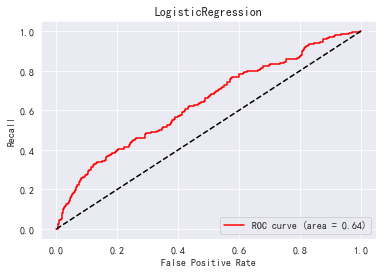

In [23]:
# 使用调好的参数测试
lr = LogisticRegression(max_iter=lr_iter_num_best,
                        class_weight={1: lr_p_weight_best}).fit(x_train, y_train)
plot_roc(lr.predict_proba(x_test),
         y_test.to_list(), name="LogisticRegression")

# 随机森林

## 初始参数

In [24]:
rfc = RandomForestClassifier().fit(x_train, y_train)

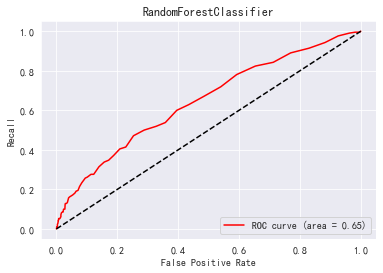

In [25]:
plot_roc(rfc.predict_proba(x_test), y_test, "RandomForestClassifier")

In [26]:
rfc = RandomForestClassifier(class_weight="balanced").fit(x_train, y_train)

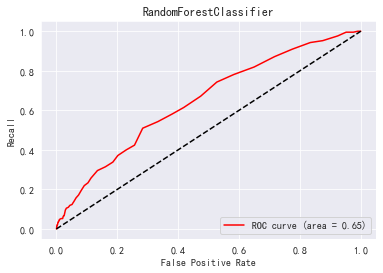

In [27]:
plot_roc(rfc.predict_proba(x_test), y_test, "RandomForestClassifier")

## n_estimators

In [28]:
auc_line = list()
accu_line = list()
n_estimators = np.arange(1, 100, 5)
for i in n_estimators:
    auc = cross_val_score(RandomForestClassifier(
        n_estimators=i), x_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()
    accu = cross_val_score(RandomForestClassifier(
        n_estimators=i), x_train, y_train, cv=cv, n_jobs=-1).mean()
    auc_line.append(auc)
    accu_line.append(accu)

n_estimators为 66 时，auc最大,为 0.60661180305289
n_estimators为 66 时，accu最大，为 0.8505007697917512


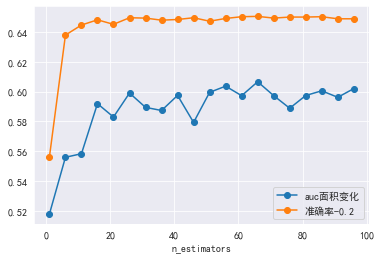

In [29]:
print("n_estimators为", n_estimators[auc_line.index(
    max(auc_line))], "时，auc最大,为", max(auc_line))
print("n_estimators为", n_estimators[accu_line.index(
    max(accu_line))], "时，accu最大，为", max(accu_line))
plt.figure()
plt.plot(n_estimators, auc_line, "-o", label="auc面积变化")
plt.xlabel("n_estimators")
plt.plot(n_estimators, np.array(accu_line)-0.2, "-o", label="准确率-0.2")
plt.legend()
plt.show()

准确率后面基本不变，主要是auc变化，所以选取auc最大的

In [30]:
rfc_n_estimators_best = n_estimators[auc_line.index(max(auc_line))]

In [31]:
# 细化学习曲线

auc_line = list()
accu_line = list()
n_estimators = np.arange(rfc_n_estimators_best-5, rfc_n_estimators_best+5)
for i in n_estimators:
    auc = cross_val_score(RandomForestClassifier(
        n_estimators=i), x_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()
    accu = cross_val_score(RandomForestClassifier(
        n_estimators=i), x_train, y_train, cv=cv, n_jobs=-1).mean()
    auc_line.append(auc)
    accu_line.append(accu)

n_estimators为 61 时，auc最大,为 0.6064519384607444
n_estimators为 63 时，accu最大，为 0.8518944980147476


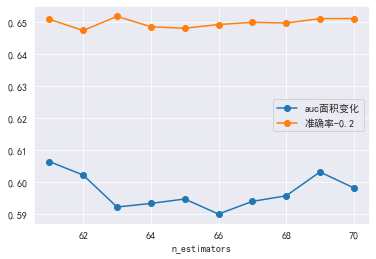

In [32]:
print("n_estimators为", n_estimators[auc_line.index(
    max(auc_line))], "时，auc最大,为", max(auc_line))
print("n_estimators为", n_estimators[accu_line.index(
    max(accu_line))], "时，accu最大，为", max(accu_line))
plt.figure()
plt.plot(n_estimators, auc_line, "-o", label="auc面积变化")
plt.xlabel("n_estimators")
plt.plot(n_estimators, np.array(accu_line)-0.2, "-o", label="准确率-0.2")
plt.legend()
plt.show()

In [33]:
rfc_n_estimators_best = n_estimators[auc_line.index(max(auc_line))]

## max_depth

In [34]:
# max_depth
auc_line = list()
accu_line = list()
max_depth = np.arange(1, 20, 1)
for i in max_depth:
    auc = cross_val_score(RandomForestClassifier(
        n_estimators=rfc_n_estimators_best, max_depth=i), x_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()
    accu = cross_val_score(RandomForestClassifier(
        n_estimators=rfc_n_estimators_best, max_depth=i), x_train, y_train, cv=cv, n_jobs=-1).mean()
    auc_line.append(auc)
    accu_line.append(accu)

max_depth为 3 时，auc最大,为 0.6303284780005534
max_depth为 8 时，accu最大，为 0.8556156983496745


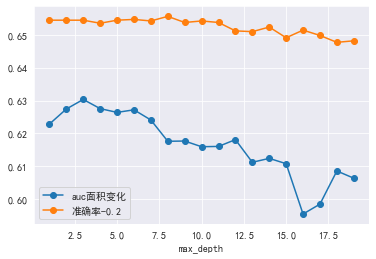

In [35]:
print("max_depth为", max_depth[auc_line.index(
    max(auc_line))], "时，auc最大,为", max(auc_line))
print("max_depth为", max_depth[accu_line.index(
    max(accu_line))], "时，accu最大，为", max(accu_line))
plt.figure()
plt.plot(max_depth, auc_line, "-o", label="auc面积变化")
plt.xlabel("max_depth")
plt.plot(max_depth, np.array(accu_line)-0.2, "-o", label="准确率-0.2")
plt.legend()
plt.show()

auc面积变化较大，根据auc确定max_depth

In [36]:
rfc_max_depth_best = max_depth[auc_line.index(max(auc_line))]

## class_weight

In [37]:
auc_line = list()
accu_line = list()
p_weight = np.arange(0, 20,0.5)
for i in p_weight:
    auc = cross_val_score(RandomForestClassifier(n_estimators=rfc_n_estimators_best,
                             max_depth=rfc_max_depth_best,class_weight={0:1,1:i}), x_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()
    accu = cross_val_score(RandomForestClassifier(n_estimators=rfc_n_estimators_best,
                             max_depth=rfc_max_depth_best,class_weight={0:1,1:i}), x_train, y_train, cv=cv, n_jobs=-1).mean()
    auc_line.append(auc)
    accu_line.append(accu)

p_weight为 2.0 时，auc最大,为 0.6347883237825863
p_weight为 3.0 时，accu最大，为 0.85538530102909


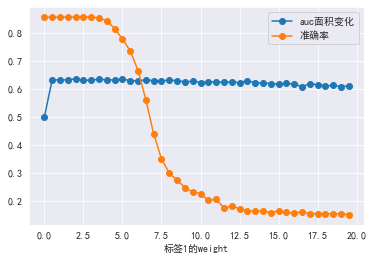

In [38]:
print("p_weight为", p_weight[auc_line.index(
    max(auc_line))], "时，auc最大,为", max(auc_line))
print("p_weight为", p_weight[accu_line.index(
    max(accu_line))], "时，accu最大，为", max(accu_line))
plt.figure()
plt.plot(p_weight, auc_line, "-o", label="auc面积变化")
plt.xlabel("标签1的weight")
plt.plot(p_weight, accu_line, "-o", label="准确率")
plt.legend()
plt.show()

 细化，在0和2.5之间找到

p_weight为 0.6000000000000001 时，auc最大,为 0.638254240257469
p_weight为 1.8 时，accu最大，为 0.8556154282473057


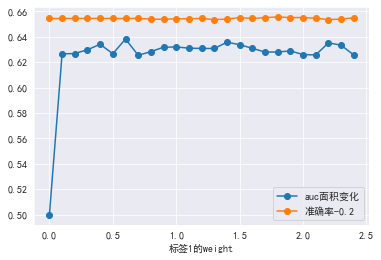

In [39]:
auc_line = list()
accu_line = list()
p_weight = np.arange(0, 2.5,0.1)
for i in p_weight:
    auc = cross_val_score(RandomForestClassifier(n_estimators=rfc_n_estimators_best,
                             max_depth=rfc_max_depth_best,class_weight={0:1,1:i}), x_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()
    accu = cross_val_score(RandomForestClassifier(n_estimators=rfc_n_estimators_best,
                             max_depth=rfc_max_depth_best,class_weight={0:1,1:i}), x_train, y_train, cv=cv, n_jobs=-1).mean()
    auc_line.append(auc)
    accu_line.append(accu)
    
print("p_weight为", p_weight[auc_line.index(
    max(auc_line))], "时，auc最大,为", max(auc_line))
print("p_weight为", p_weight[accu_line.index(
    max(accu_line))], "时，accu最大，为", max(accu_line))
plt.figure()
plt.plot(p_weight, auc_line, "-o", label="auc面积变化")
plt.xlabel("标签1的weight")
plt.plot(p_weight, np.array(accu_line)-0.2, "-o", label="准确率-0.2")
plt.legend()
plt.show()

因为右侧准确率基本没变，所以这里选用最大的auc处的值

In [40]:
rfc_p_weight_best = p_weight[auc_line.index(max(auc_line))]

## 最终模型

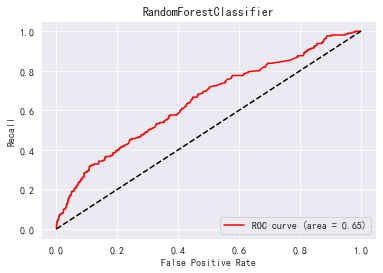

In [41]:
# 使用调好的参数测试
rfc = RandomForestClassifier(n_estimators=rfc_n_estimators_best,
                             max_depth=rfc_max_depth_best,class_weight={1:rfc_p_weight_best,0:1}).fit(x_train, y_train)
plot_roc(rfc.predict_proba(x_test), y_test, "RandomForestClassifier")

In [42]:
print(classification_report(y_test,rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1224
           1       0.00      0.00      0.00       210

    accuracy                           0.85      1434
   macro avg       0.43      0.50      0.46      1434
weighted avg       0.73      0.85      0.79      1434



D:\learn\anaconda3\envs\learn\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
confusion_matrix(y_test,rfc.predict(x_test))

array([[1224,    0],
       [ 210,    0]], dtype=int64)

# SVM

In [44]:
svc = SVC(probability=True).fit(x_train, y_train)

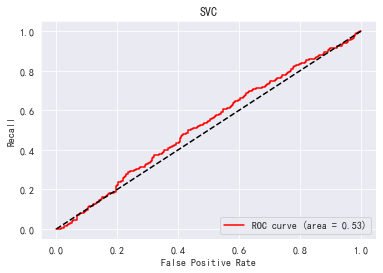

In [45]:
plot_roc(svc.predict_proba(x_test), y_test, "SVC")

In [46]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

D:\learn\anaconda3\envs\learn\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\learn\anaconda3\envs\learn\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


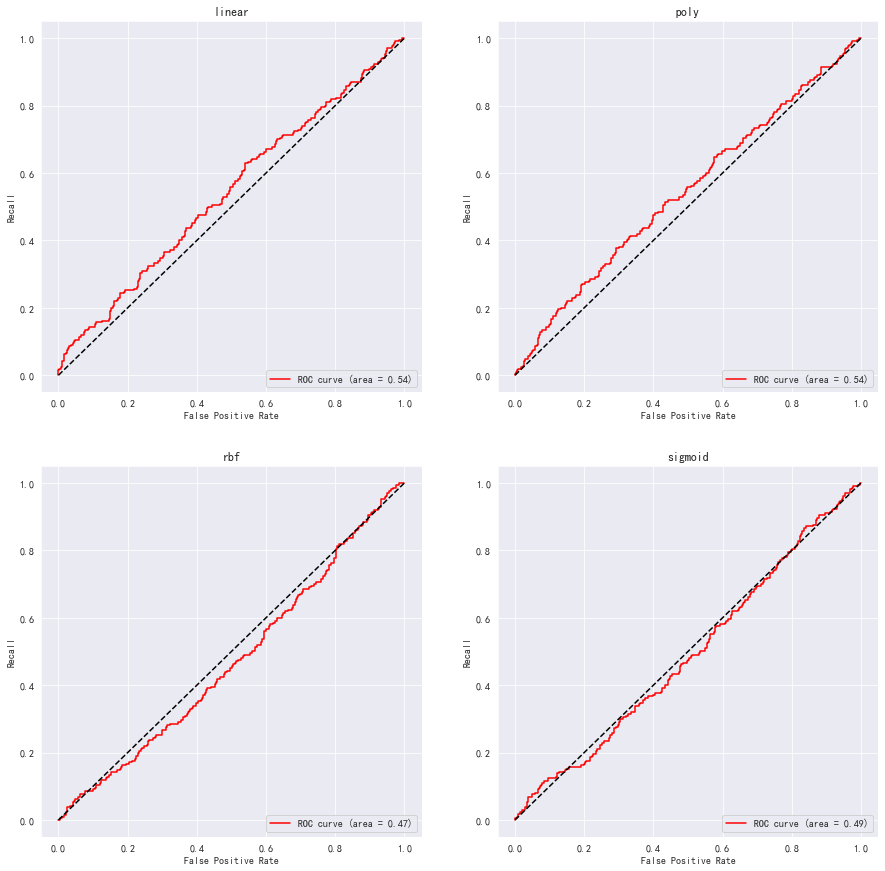

In [47]:
Kernel = ["linear", "poly", "rbf", "sigmoid"]
i = 1
plt.figure(figsize=(15, 15))
for kernel in Kernel:
    svc = SVC(kernel=kernel, probability=True,
              max_iter=100000).fit(x_train, y_train)
    plot_roc_multi(svc.predict_proba(x_test), y_test,
                   nrows=2, ncols=2, num=i, name=kernel)
    i += 1
plt.show()

基本没法用，将数据标准化化后重新进行测试

In [48]:
from sklearn.preprocessing import StandardScaler

stand = StandardScaler()

x_stand = stand.fit_transform(feature_label.iloc[:, 0:-1])

x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(
    x_stand, feature_label["是否逾期"], test_size=0.2, random_state=42)

D:\learn\anaconda3\envs\learn\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


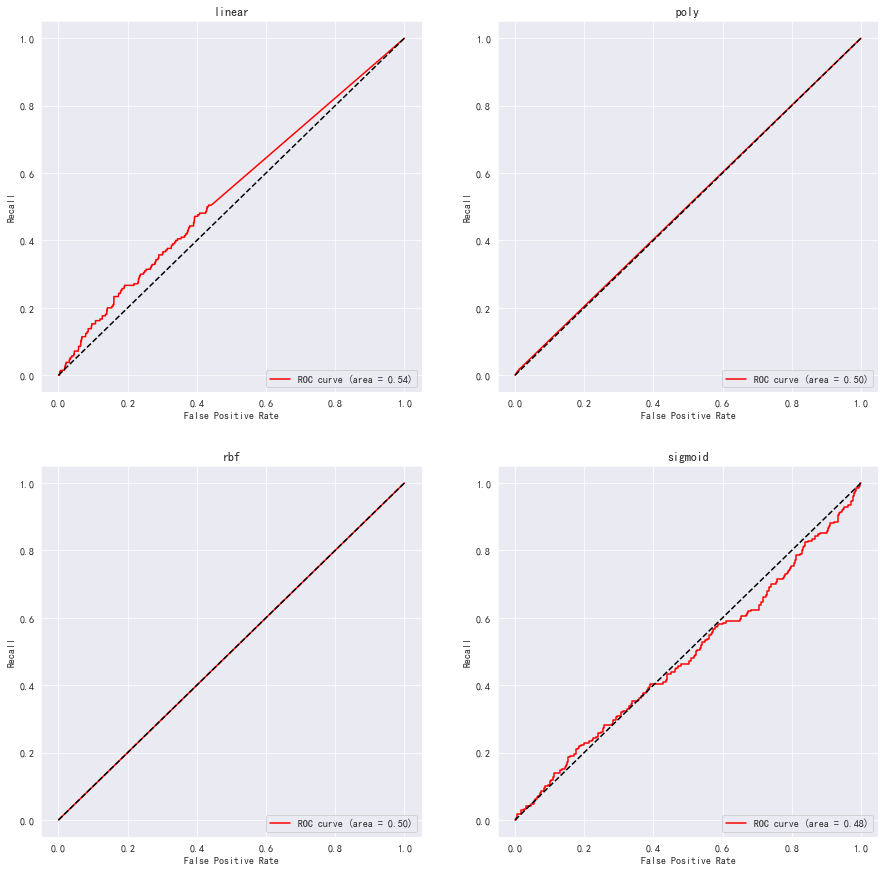

In [49]:
Kernel = ["linear", "poly", "rbf", "sigmoid"]
i = 1
plt.figure(figsize=(15, 15))
for kernel in Kernel:
    svc = SVC(kernel=kernel, probability=True,
              max_iter=100000).fit(x_train_s, y_train_s)
    plot_roc_multi(svc.predict_proba(x_test), y_test,
                   nrows=2, ncols=2, num=i, name=kernel)
    i += 1
plt.show()

表现极差，没办法使用，不进行进一步的调参，直接舍弃

# XGBoost

## booster选择

In [50]:
boosters = ["gbtree", "gblinear","dart"]

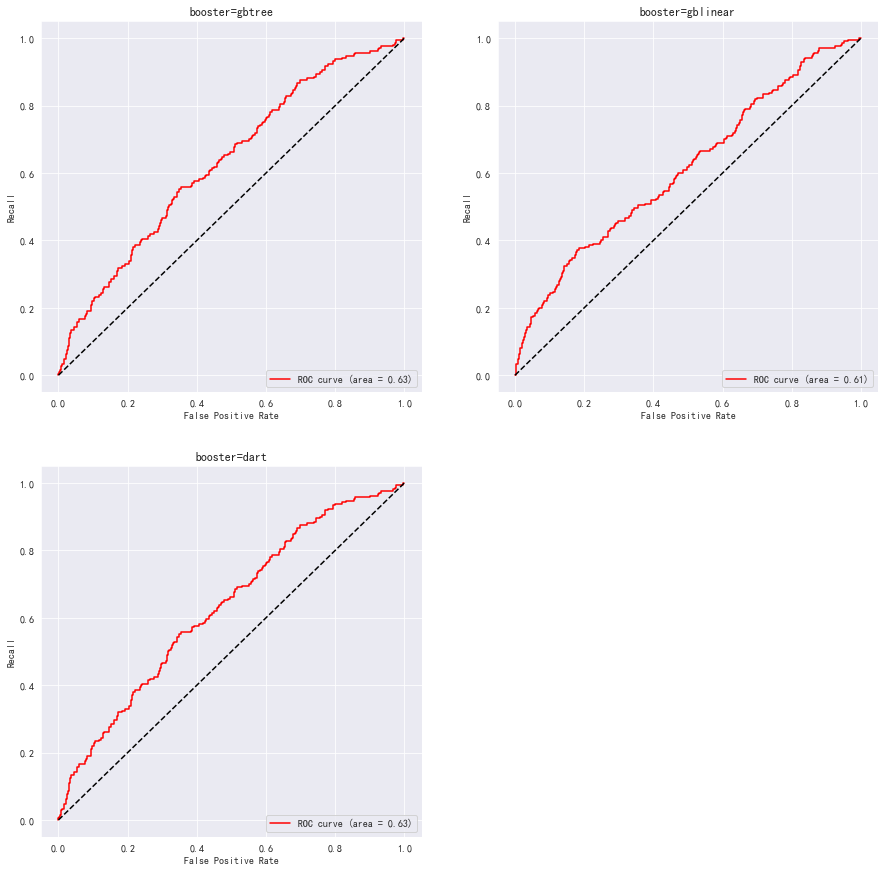

In [51]:
plt.figure(figsize=(15,15))
i = 1
for b in boosters:
    xgb = XGBClassifier(booster=b).fit(x_train,y_train)
    plot_roc_multi(xgb.predict_proba(x_test),y_test,nrows=2,ncols=2, num =i, name=("booster=%s" % b))
    i+=1
plt.show()    

从gbtree和dart两个效果基本相同，这里选用gbtree进行调参

## n_estimators

In [52]:
auc_line = list()
accu_line = list()
n_estimators = np.arange(1, 100, 5)
for i in n_estimators:
    auc = cross_val_score(XGBClassifier(booster = "gbtree",
        n_estimators=i), x_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()
    accu = cross_val_score(XGBClassifier(booster = "gbtree",
        n_estimators=i), x_train, y_train, cv=cv, n_jobs=-1).mean()
    auc_line.append(auc)
    accu_line.append(accu)

n_estimators为 16 时，auc最大,为 0.6070234695021899
n_estimators为 6 时，accu最大，为 0.8495697269265051


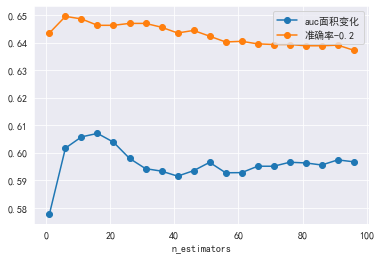

In [53]:
print("n_estimators为", n_estimators[auc_line.index(
    max(auc_line))], "时，auc最大,为", max(auc_line))
print("n_estimators为", n_estimators[accu_line.index(
    max(accu_line))], "时，accu最大，为", max(accu_line))
plt.figure()
plt.plot(n_estimators, auc_line, "-o", label="auc面积变化")
plt.xlabel("n_estimators")
plt.plot(n_estimators, np.array(accu_line)-0.2, "-o", label="准确率-0.2")
plt.legend()
plt.show()

细化学习曲线，在0-20处查找auc和准确率最高点

In [54]:
auc_line = list()
accu_line = list()
n_estimators = np.arange(1, 21, 1)
for i in n_estimators:
    auc = cross_val_score(XGBClassifier(booster = "gbtree",
        n_estimators=i), x_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()
    accu = cross_val_score(XGBClassifier(booster = "gbtree",
        n_estimators=i), x_train, y_train, cv=cv, n_jobs=-1).mean()
    auc_line.append(auc)
    accu_line.append(accu)

n_estimators为 15 时，auc最大,为 0.6096282901374708
n_estimators为 7 时，accu最大，为 0.8504996893822758


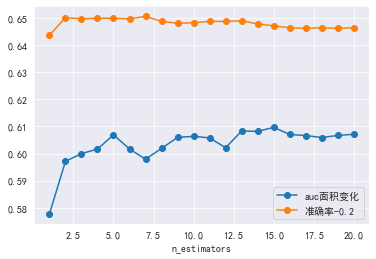

In [55]:
print("n_estimators为", n_estimators[auc_line.index(
    max(auc_line))], "时，auc最大,为", max(auc_line))
print("n_estimators为", n_estimators[accu_line.index(
    max(accu_line))], "时，accu最大，为", max(accu_line))
plt.figure()
plt.plot(n_estimators, auc_line, "-o", label="auc面积变化")
plt.xlabel("n_estimators")
plt.plot(n_estimators, np.array(accu_line)-0.2, "-o", label="准确率-0.2")
plt.legend()
plt.show()

准确率基本保持不变。选择auc最高处

In [56]:
xgb_n_estimators_best = n_estimators[auc_line.index(max(auc_line))]

## min_child_weight 

In [57]:
auc_line = list()
accu_line = list()
min_child_weights = np.arange(1, 10, 1)
for i in min_child_weights:
    auc = cross_val_score(XGBClassifier(booster = "gbtree",
        n_estimators=xgb_n_estimators_best,min_child_weight=i), x_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()
    accu = cross_val_score(XGBClassifier(booster = "gbtree",
        n_estimators=xgb_n_estimators_best,min_child_weight=i), x_train, y_train, cv=cv, n_jobs=-1).mean()
    auc_line.append(auc)
    accu_line.append(accu)

min_child_weight为 8 时，auc最大,为 0.6203742360041218
min_child_weight为 8 时，accu最大，为 0.8521284066661264


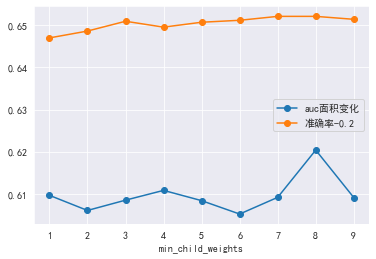

In [58]:
print("min_child_weight为", min_child_weights[auc_line.index(
    max(auc_line))], "时，auc最大,为", max(auc_line))
print("min_child_weight为", min_child_weights[accu_line.index(
    max(accu_line))], "时，accu最大，为", max(accu_line))
plt.figure()
plt.plot(min_child_weights, auc_line, "-o", label="auc面积变化")
plt.xlabel("min_child_weights")
plt.plot(min_child_weights, np.array(accu_line)-0.2, "-o", label="准确率-0.2")
plt.legend()
plt.show()

min_child_weight为 9.099999999999993 时，auc最大,为 0.6231071622143469
min_child_weight为 7.299999999999999 时，accu最大，为 0.8556170488615186


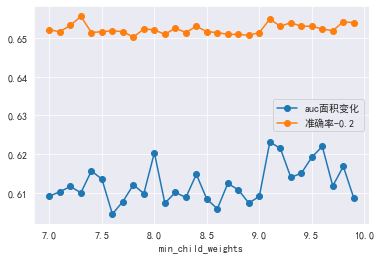

In [59]:
# 细化
auc_line = list()
accu_line = list()
min_child_weights = np.arange(7, 10, 0.1)
for i in min_child_weights:
    auc = cross_val_score(XGBClassifier(booster = "gbtree",
        n_estimators=xgb_n_estimators_best,min_child_weight=i), x_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()
    accu = cross_val_score(XGBClassifier(booster = "gbtree",
        n_estimators=xgb_n_estimators_best,min_child_weight=i), x_train, y_train, cv=cv, n_jobs=-1).mean()
    auc_line.append(auc)
    accu_line.append(accu)
    
print("min_child_weight为", min_child_weights[auc_line.index(
    max(auc_line))], "时，auc最大,为", max(auc_line))
print("min_child_weight为", min_child_weights[accu_line.index(
    max(accu_line))], "时，accu最大，为", max(accu_line))
plt.figure()
plt.plot(min_child_weights, auc_line, "-o", label="auc面积变化")
plt.xlabel("min_child_weights")
plt.plot(min_child_weights, np.array(accu_line)-0.2, "-o", label="准确率-0.2")
plt.legend()
plt.show()

In [60]:
xgb_min_child_weight_best = min_child_weights[auc_line.index(max(auc_line))]

## max_depth

In [61]:
auc_line = list()
accu_line = list()
max_depth = np.arange(1, 20, 1)
for i in max_depth:
    auc = cross_val_score(XGBClassifier(booster = "gbtree",min_child_weight=xgb_min_child_weight_best,
        n_estimators=xgb_n_estimators_best, max_depth=i), x_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()
    accu = cross_val_score(XGBClassifier(booster = "gbtree",min_child_weight=xgb_min_child_weight_best,
        n_estimators=xgb_n_estimators_best, max_depth=i), x_train, y_train, cv=cv, n_jobs=-1).mean()
    auc_line.append(auc)
    accu_line.append(accu)

max_depth为 6 时，auc最大,为 0.6231071622143469
max_depth为 6 时，accu最大，为 0.8549188342381763


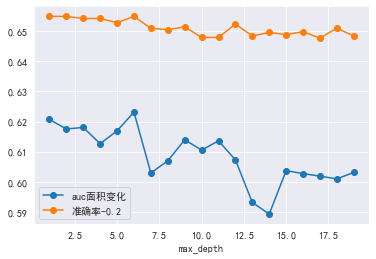

In [62]:
print("max_depth为", max_depth[auc_line.index(
    max(auc_line))], "时，auc最大,为", max(auc_line))
print("max_depth为", max_depth[accu_line.index(
    max(accu_line))], "时，accu最大，为", max(accu_line))
plt.figure()
plt.plot(max_depth, auc_line, "-o", label="auc面积变化")
plt.xlabel("max_depth")
plt.plot(max_depth, np.array(accu_line)-0.2, "-o", label="准确率-0.2")
plt.legend()
plt.show()

都呈下降趋势

深度为1的时候效果居然最好

In [63]:
max_depth[auc_line.index(max(auc_line))]==max_depth[accu_line.index(max(accu_line))]

True

In [64]:
xgb_max_depth_best = max_depth[auc_line.index(max(auc_line))]

## learning_rate

learnning_rate为 1e-05 时，auc最大,为 0.6231071622143469
learnning_rate为 1e-05 时，accu最大，为 0.8549188342381763


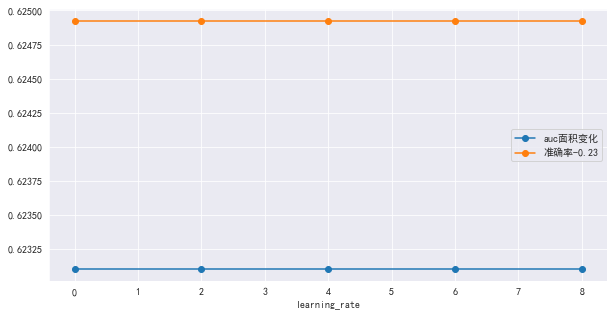

In [65]:
auc_line = list()
accu_line = list()
learning_rates = np.arange(0.00001,10, 2)
for i in learning_rates:
    auc = cross_val_score(XGBClassifier(booster = "gbtree",min_child_weight=xgb_min_child_weight_best,
        n_estimators=xgb_n_estimators_best, max_depth=xgb_max_depth_best,learing_rate=i), x_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()
    accu = cross_val_score(XGBClassifier(booster = "gbtree",min_child_weight=xgb_min_child_weight_best,
        n_estimators=xgb_n_estimators_best, max_depth=xgb_max_depth_best,learing_rate=i), x_train, y_train, cv=cv, n_jobs=-1).mean()
    auc_line.append(auc)
    accu_line.append(accu)

print("learnning_rate为",learning_rates[auc_line.index(
    max(auc_line))], "时，auc最大,为", max(auc_line))
print("learnning_rate为",learning_rates[accu_line.index(
    max(accu_line))], "时，accu最大，为", max(accu_line))
plt.figure(figsize=(10,5))
plt.plot(learning_rates, auc_line, "-o", label="auc面积变化")
plt.xlabel("learning_rate")
plt.plot(learning_rates, np.array(accu_line)-0.23, "-o", label="准确率-0.23")
plt.legend()
plt.show()

learnning_rate为 1e-05 时，auc最大,为 0.6231071622143469
learnning_rate为 1e-05 时，accu最大，为 0.8549188342381763


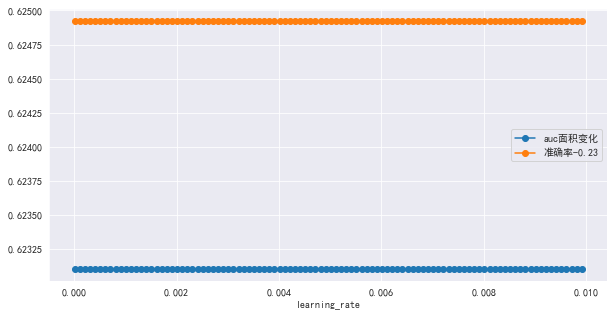

In [66]:
# max_depth
auc_line = list()
accu_line = list()
learning_rates = np.arange(0.00001,0.01, 0.0001)
for i in learning_rates:
    auc = cross_val_score(XGBClassifier(booster = "gbtree",min_child_weight=xgb_min_child_weight_best,
        n_estimators=xgb_n_estimators_best, max_depth=xgb_max_depth_best,learing_rate=i), x_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()
    accu = cross_val_score(XGBClassifier(booster = "gbtree",min_child_weight=xgb_min_child_weight_best,
        n_estimators=xgb_n_estimators_best, max_depth=xgb_max_depth_best,learing_rate=i), x_train, y_train, cv=cv, n_jobs=-1).mean()
    auc_line.append(auc)
    accu_line.append(accu)

print("learnning_rate为",learning_rates[auc_line.index(
    max(auc_line))], "时，auc最大,为", max(auc_line))
print("learnning_rate为",learning_rates[accu_line.index(
    max(accu_line))], "时，accu最大，为", max(accu_line))
plt.figure(figsize=(10,5))
plt.plot(learning_rates, auc_line, "-o", label="auc面积变化")
plt.xlabel("learning_rate")
plt.plot(learning_rates, np.array(accu_line)-0.23, "-o", label="准确率-0.23")
plt.legend()
plt.show()

学习率基本没用，调不了

## scale_pos_weight

scale_pos_weight 为 0.51 时，auc最大,为 0.6188930007079241
scale_pos_weight 为 0.01 时，accu最大，为 0.8544534478567376


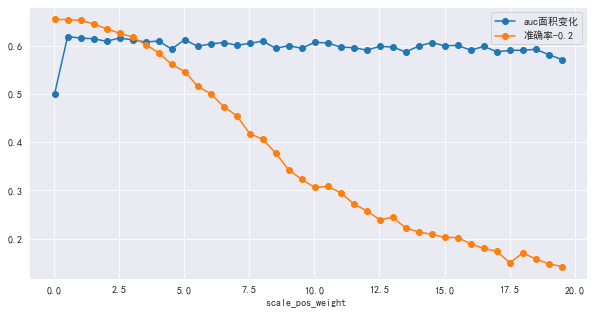

In [67]:
auc_line = list()
accu_line = list()
scale_pos_weights = np.arange(0.01,20,0.5)
for i in scale_pos_weights:
    auc = cross_val_score(XGBClassifier(booster = "gbtree",min_child_weight=xgb_min_child_weight_best,
        n_estimators=xgb_n_estimators_best, max_depth=xgb_max_depth_best,scale_pos_weight = i), x_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()
    accu = cross_val_score(XGBClassifier(booster = "gbtree",min_child_weight=xgb_min_child_weight_best,
        n_estimators=xgb_n_estimators_best, max_depth=xgb_max_depth_best,scale_pos_weight = i), x_train, y_train, cv=cv, n_jobs=-1).mean()
    auc_line.append(auc)
    accu_line.append(accu)

print("scale_pos_weight 为",scale_pos_weights[auc_line.index(
    max(auc_line))], "时，auc最大,为", max(auc_line))
print("scale_pos_weight 为",scale_pos_weights[accu_line.index(
    max(accu_line))], "时，accu最大，为", max(accu_line))
plt.figure(figsize=(10,5))
plt.plot(scale_pos_weights, auc_line, "-o", label="auc面积变化")
plt.xlabel("scale_pos_weight ")
plt.plot(scale_pos_weights, np.array(accu_line)-0.2, "-o", label="准确率-0.2")
plt.legend()
plt.show()

scale_pos_weight 为 0.7368421052631579 时，auc最大,为 0.6233608240858535
scale_pos_weight 为 0.7368421052631579 时，accu最大，为 0.8553836804148773


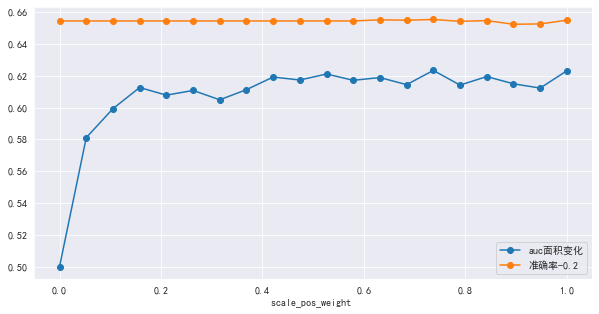

In [68]:
auc_line = list()
accu_line = list()
scale_pos_weights = np.linspace(0,1,20)
for i in scale_pos_weights:
    auc = cross_val_score(XGBClassifier(booster = "gbtree",min_child_weight=xgb_min_child_weight_best,
        n_estimators=xgb_n_estimators_best, max_depth=xgb_max_depth_best,scale_pos_weight = i), x_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()
    accu = cross_val_score(XGBClassifier(booster = "gbtree",min_child_weight=xgb_min_child_weight_best,
        n_estimators=xgb_n_estimators_best, max_depth=xgb_max_depth_best,scale_pos_weight = i), x_train, y_train, cv=cv, n_jobs=-1).mean()
    auc_line.append(auc)
    accu_line.append(accu)

print("scale_pos_weight 为",scale_pos_weights[auc_line.index(
    max(auc_line))], "时，auc最大,为", max(auc_line))
print("scale_pos_weight 为",scale_pos_weights[accu_line.index(
    max(accu_line))], "时，accu最大，为", max(accu_line))
plt.figure(figsize=(10,5))
plt.plot(scale_pos_weights, auc_line, "-o", label="auc面积变化")
plt.xlabel("scale_pos_weight ")
plt.plot(scale_pos_weights, np.array(accu_line)-0.2, "-o", label="准确率-0.2")
plt.legend()
plt.show()

In [69]:
xgb_scale_pos_weight_best =scale_pos_weights[auc_line.index(max(auc_line))]

## 最终模型

In [70]:
xgb = XGBClassifier(n_estimators=xgb_n_estimators_best,max_depth = xgb_max_depth_best,booster="gbtree",min_child_weight=xgb_min_child_weight_best,scale_pos_weight=xgb_scale_pos_weight_best).fit(x_train,y_train)

In [79]:
print(xgb_max_depth_best,xgb_min_child_weight_best,xgb_n_estimators_best,xgb_scale_pos_weight_best)

6 9.099999999999993 15 0.7368421052631579


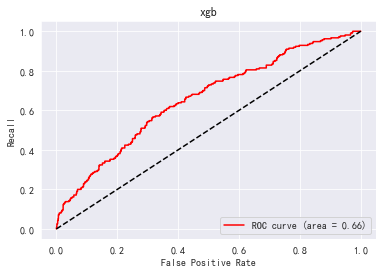

In [72]:
plot_roc(xgb.predict_proba(x_test),y_test,name="xgb")

# 总结

四个模型中，XGBoost的表现最好。auc达到了0.66。

下面找到对应的约登指数。

In [73]:
FPR, recall, thresholds = roc_curve(y_test,xgb.predict_proba(x_test)[:,1], pos_label=1)

In [74]:
maxindex = (recall - FPR).tolist().index(max(recall - FPR))

In [75]:
# 正确率
xgb.score(x_test,y_test)

0.8542538354253836

In [76]:
print(classification_report(y_test,xgb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1224
           1       0.56      0.02      0.05       210

    accuracy                           0.85      1434
   macro avg       0.71      0.51      0.48      1434
weighted avg       0.81      0.85      0.79      1434



In [77]:
print("阀值为：", thresholds[maxindex], "时,recall为：",recall[maxindex],"  FPR为：",FPR[maxindex] )

阀值为： 0.117046334 时,recall为： 0.5666666666666667   FPR为： 0.31699346405228757
